In [71]:
# Para hacer los ejemplos vamos a usar la base de datos de arbolado
import pandas as pd

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_11108\1598610678.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [72]:
# Vamos a quedarnos con un dataset reducido

arbolado = arboles[['comuna','nombre_cientifico','altura_arbol','diametro_altura_pecho']]
especies = arbolado['nombre_cientifico'].value_counts().index[:3]
arbolado = arbolado[arbolado['nombre_cientifico'].isin(especies)].sample(1000)

In [73]:
arbolado.head(20)

,comuna,nombre_cientifico,altura_arbol,diametro_altura_pecho
345962,15,Fraxinus pennsylvanica,12.0,48.0
150485,9,Fraxinus pennsylvanica,10.0,54.0
56416,4,Fraxinus pennsylvanica,6.0,29.0
238935,12,Ficus benjamina,13.0,47.0
180321,10,Ficus benjamina,8.0,46.0
11655,2,Fraxinus pennsylvanica,5.0,20.0
364536,12,Fraxinus pennsylvanica,6.0,18.0
317624,14,Platanus x acerifolia,26.0,56.0
194772,10,Fraxinus pennsylvanica,7.0,32.0
292195,13,Fraxinus pennsylvanica,9.0,3.0


In [74]:
arbolado.isna().sum()

comuna                   0
nombre_cientifico        0
altura_arbol             6
diametro_altura_pecho    1
dtype: int64

In [75]:
arbolado.dropna(axis=0, inplace=True)

In [76]:
y = arbolado['nombre_cientifico']
X = arbolado.drop(columns=['nombre_cientifico'])

In [77]:
y.head()

345962    Fraxinus pennsylvanica
150485    Fraxinus pennsylvanica
56416     Fraxinus pennsylvanica
238935           Ficus benjamina
180321           Ficus benjamina
Name: nombre_cientifico, dtype: object

In [78]:
X.head()

,comuna,altura_arbol,diametro_altura_pecho
345962,15,12.0,48.0
150485,9,10.0,54.0
56416,4,6.0,29.0
238935,12,13.0,47.0
180321,10,8.0,46.0


In [79]:
X.dtypes

comuna                     int64
altura_arbol             float64
diametro_altura_pecho    float64
dtype: object

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree_max = DecisionTreeClassifier(max_depth=3)


In [82]:
tree.fit(X_train, y_train)
tree_max.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

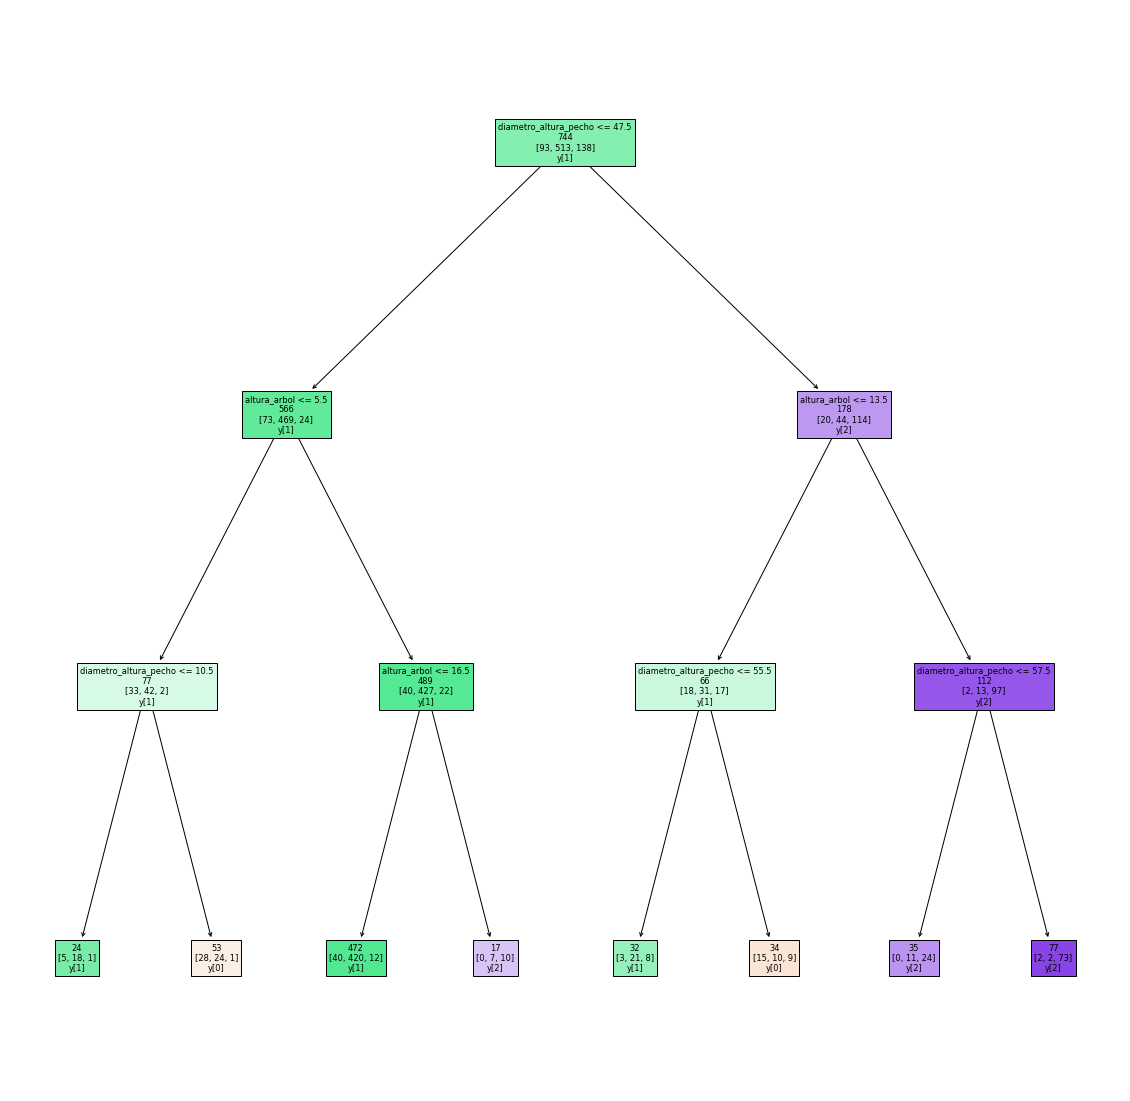

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
plot_tree(tree_max,feature_names=X_train.columns, filled=True, class_names=True, label=None, impurity=False) 
plt.show()

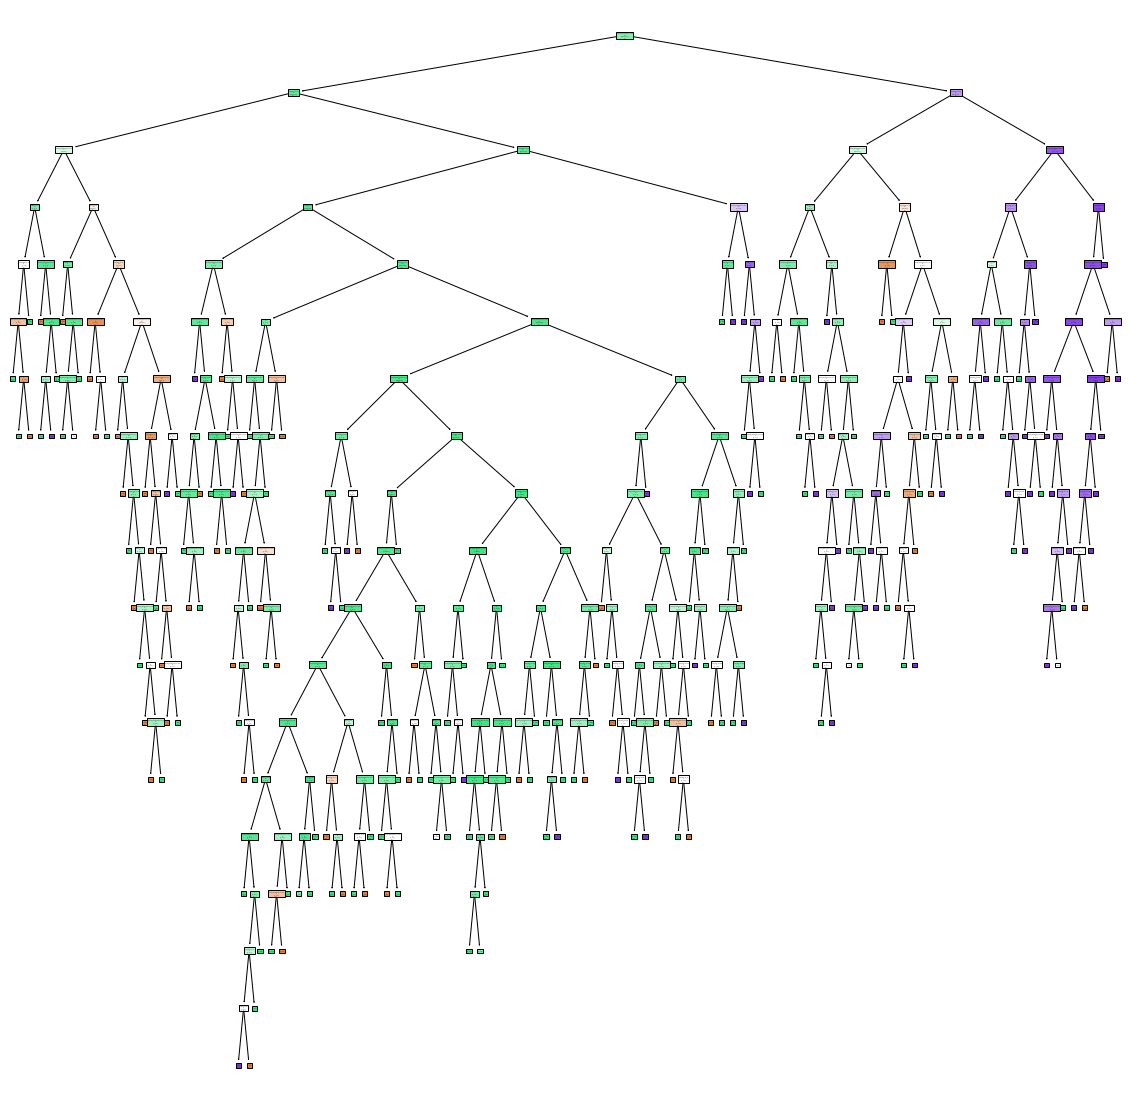

In [85]:
plt.figure(figsize=(20,20))
plot_tree(tree,feature_names=X_train.columns, filled=True, class_names=True, label=None, impurity=False) 
plt.show()

In [86]:
from sklearn.metrics import accuracy_score
ypred = tree.predict(X_train)
ypred_max = tree_max.predict(X_train)

In [87]:
print (f'El acuracy del modelo ilimitado en nodos fue de {accuracy_score(y_train, ypred)}')
print (f'El acuracy del modelo limitado a tres nodos fue de {accuracy_score(y_train, ypred_max)}')

El acuracy del modelo ilimitado en nodos fue de 0.9919354838709677
El acuracy del modelo limitado a tres nodos fue de 0.8185483870967742


# ¿Que es mejor?

In [88]:
ypred_t = tree.predict(X_test)
ypred_max_t = tree_max.predict(X_test)

In [89]:
print (f'Si testeamos el acuracy del modelo ilimitado en nodos fue de {accuracy_score(y_test, ypred_t)}')
print (f'Si testeamos el acuracy del modelo limitado a tres nodos fue de {accuracy_score(y_test, ypred_max_t)}')

Si testeamos el acuracy del modelo ilimitado en nodos fue de 0.7389558232931727
Si testeamos el acuracy del modelo limitado a tres nodos fue de 0.8152610441767069


In [90]:
# Veamos otro modelo, el knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
X_knn = X.drop(columns=['comuna'])
X_train, X_test, y_train, y_test = train_test_split(X_knn, y)
knn.fit(X_train,y_train)
ypred_knn = knn.predict(X_test)
print (f'Si testeamos el acuracy del modelo knn en sus hiperparametros default da de {accuracy_score(y_test, ypred_knn)}')



Si testeamos el acuracy del modelo knn en sus hiperparametros default da de 0.8112449799196787


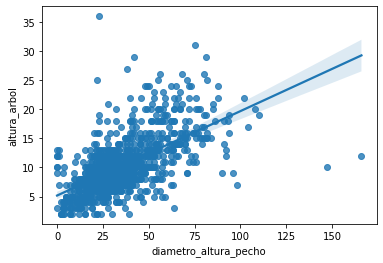

In [91]:
# Otras cosas...

import seaborn as sns

ax = sns.regplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado)

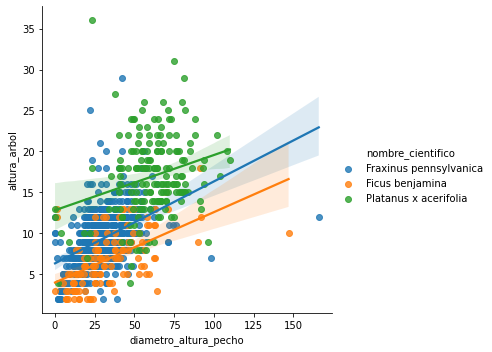

In [93]:
ax = sns.lmplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado, hue='nombre_cientifico')